### Imports et initialisations

In [1]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras as keras
import random
import re
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from clustertools import *

#répertoire dans lequel seront stockés les clusters, doit se terminer obligatoirement par /
cluster_dir = "1Mtweet_clusters/"
clean_dataset_file = "clean_1milliontweet.txt"
raw_dataset_file = "raw_1milliontweet.txt"

##### Récupération des tweets

In [2]:
with open(clean_dataset_file, "r") as file:
    lines = file.readlines()
    
clean_sample = [line.split() for line in lines]

with open(raw_dataset_file, "r") as file:
    raw_sample = file.readlines()

### Encodage à l'aide d'un modèle word2vec entraîné avec les données

On charge le modèle depuis le disque

In [3]:
from gensim.models import KeyedVectors

In [4]:
w2v = KeyedVectors.load("w2vec_model_d100_1M")

In [5]:
#encode un message
def encode(msg):
    return np.mean([w2v[word] for word in msg if word in w2v] or [np.zeros(100)], axis = 0)

In [6]:
%%time
#encodage de l'échantillon pour créer le jeu de données
dataset_encoded = np.array([encode(msg) for msg in clean_sample])

CPU times: user 18.2 s, sys: 227 ms, total: 18.4 s
Wall time: 18.5 s


### Visualisation du dataset

- On réalise une réduction de dimension afin de visualiser les données dans une grille en deux dimensions
- On utilise pour cela la méthode PCA

In [7]:
%%time

pca = PCA(n_components=2)

#On crée une version en deux dimensions de notre jeu de données
two_dim_dataset = pca.fit_transform(dataset_encoded)

CPU times: user 27.1 s, sys: 10.7 s, total: 37.8 s
Wall time: 5.77 s


In [8]:
#On utilise la matrice transposée de notre jeu de données pour pouvoir visualiser les données
b = two_dim_dataset.T

#Taille des figures
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

In [9]:
init_globals(clean_sample, raw_sample, dataset_encoded, two_dim_dataset, cluster_dir)

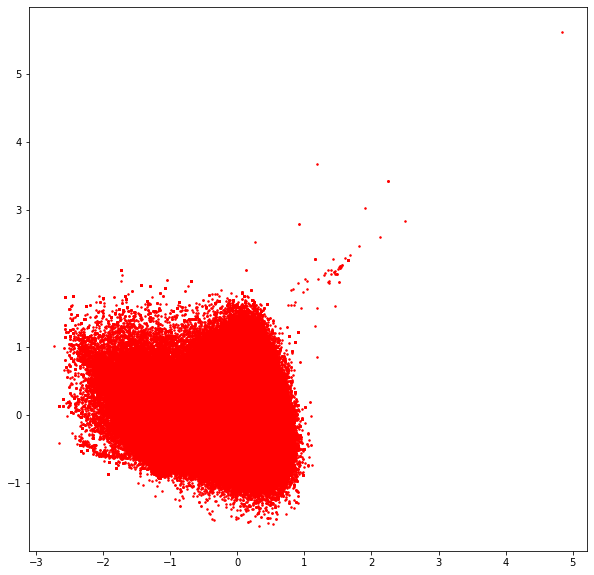

In [10]:
#Affichage des données
plt.plot(b[0], b[1], 'r.')
plt.show()

### SOM

In [11]:
import somoclu

In [12]:
sample = random.sample(clean_sample, 10000)

In [13]:
sample_enc = np.array([encode(elt) for elt in sample])

In [26]:
som = somoclu.Somoclu(15, 15)

In [36]:
%%time
som.train(sample_enc)

CPU times: user 8.99 s, sys: 0 ns, total: 8.99 s
Wall time: 1.2 s


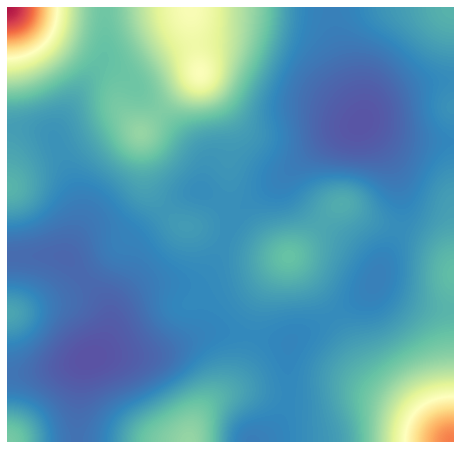

<module 'matplotlib.pyplot' from '/home/victor/fidle/fidle-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [28]:
som.view_umatrix()

In [23]:
colors = ["red"] * 8
colors.extend(["green"] * 8)
colors.extend(["blue"] * 9)
labels = range(25)

In [31]:
som.cluster()

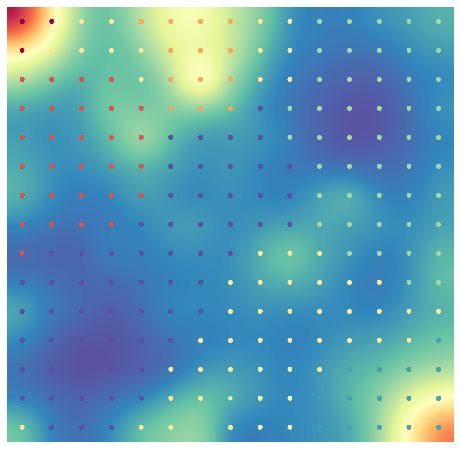

<module 'matplotlib.pyplot' from '/home/victor/fidle/fidle-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [32]:
som.view_umatrix(bestmatches=True)

In [45]:
ss = som.get_surface_state()

In [46]:
ss.shape

(10000, 225)

In [52]:
bmus = som.get_bmus(ss)

In [60]:
bmus[1]

In [63]:
import sklearn

In [64]:
som.view_similarity_matrix()

Exception: Import dependencies missing for viewing similarity matrix. You must have seaborn and scikit-learn

In [67]:
som.clusters

array([[7, 7, 4, 4, 5, 5, 5, 5, 4, 4, 2, 2, 2, 2, 2],
       [7, 4, 4, 4, 4, 5, 5, 5, 4, 4, 2, 2, 2, 2, 2],
       [6, 6, 6, 6, 4, 5, 5, 5, 4, 4, 2, 2, 2, 2, 2],
       [6, 6, 6, 6, 6, 5, 5, 5, 0, 2, 2, 2, 2, 2, 2],
       [6, 6, 6, 6, 6, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
       [6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
       [6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
       [6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
       [6, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4],
       [0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 1],
       [0, 0, 0, 0, 0, 4, 4, 4, 3, 3, 4, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 4, 4, 3, 3, 3, 1, 1, 1, 1, 1],
       [4, 0, 0, 0, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 1]])

In [69]:
som.bmus[0]

array([ 2, 10], dtype=int32)

In [73]:
som.clusters[som.bmus[0,0], som.bmus[0,1]]

2